In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

In [14]:
tf.__version__

'2.7.0'

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

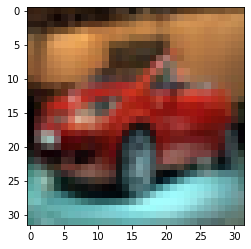

In [5]:
plt.imshow(x_train[45])

In [6]:
x_train = x_train/255

In [7]:
x_test = x_test/255

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train)

In [10]:
y_cat_test = to_categorical(y_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten


In [12]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
#op
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

ImportError: cannot import name 'EarlyStoppingh' from 'tensorflow.keras.callbacks' (C:\Users\mahen\Anaconda3\envs\tf\lib\site-packages\keras\api\_v2\keras\callbacks\__init__.py)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 25s 491us/sample - loss: 1.5161 - accuracy: 0.4515 - val_loss: 1.2533 - val_accuracy: 0.5547
Epoch 2/15
50000/50000 [==============================] - 16s 312us/sample - loss: 1.1738 - accuracy: 0.5874 - val_loss: 1.1097 - val_accuracy: 0.6112
Epoch 3/15
50000/50000 [==============================] - 16s 313us/sample - loss: 1.0292 - accuracy: 0.6394 - val_loss: 1.0619 - val_accuracy: 0.6253
Epoch 4/15
50000/50000 [==============================] - 18s 350us/sample - loss: 0.9289 - accuracy: 0.6759 - val_loss: 1.0056 - val_accuracy: 0.6536
Epoch 5/15
50000/50000 [==============================] - 16s 315us/sample - loss: 0.8370 - accuracy: 0.7067 - val_loss: 0.9831 - val_accuracy: 0.6616
Epoch 6/15
50000/50000 [==============================] - 17s 333us/sample - loss: 0.7614 - accuracy: 0.7338 - val_loss: 0.9571 - val_accuracy: 0.6771
Epoch 7/15
50000/50000 [====================

In [ ]:
metrics=pd.DataFrame(model.history.history)

ERROR! Session/line number was not unique in database. History logging moved to new session 381


In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.516079,0.45148,1.253290,0.5547
1,1.173823,0.58740,1.109713,0.6112
2,1.029195,0.63936,1.061872,0.6253
3,0.928861,0.67590,1.005590,0.6536
4,0.837004,0.70674,0.983119,0.6616
5,0.761431,0.73382,0.957080,0.6771
6,0.692951,0.75768,0.990110,0.6618


<AxesSubplot:>

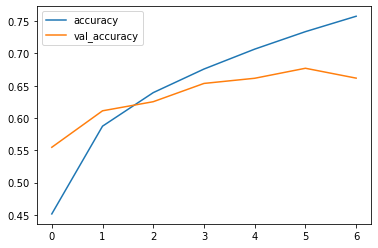

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

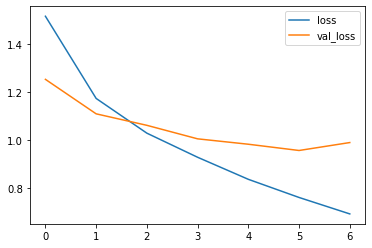

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9901103746414185, 0.6618]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.80      0.70      1000
           1       0.73      0.84      0.78      1000
           2       0.57      0.58      0.57      1000
           3       0.48      0.46      0.47      1000
           4       0.73      0.48      0.58      1000
           5       0.51      0.60      0.55      1000
           6       0.71      0.78      0.74      1000
           7       0.73      0.71      0.72      1000
           8       0.83      0.70      0.76      1000
           9       0.78      0.67      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[795,  34,  47,   9,   9,  10,  13,   9,  49,  25],
       [ 37, 844,   5,   8,   1,   7,   9,   8,  23,  58],
       [ 86,  18, 578,  69,  37,  80,  86,  29,   9,   8],
       [ 25,  21,  85, 455,  38, 237,  75,  35,  10,  19],
       [ 48,   8, 117,  90, 485,  74,  76,  88,  12,   2],
       [ 19,  10,  68, 162,  34, 602,  34,  55,   5,  11],
       [ 10,  15,  46,  62,  22,  43, 779,  11,   4,   8],
       [ 37,   8,  35,  47,  31,  92,  10, 713,   3,  24],
       [148,  46,  24,  16,   2,  22,   9,   3, 698,  32],
       [ 55, 155,  15,  27,   1,  11,  13,  21,  33, 669]], dtype=int64)

In [ ]:
import seaborn as sns

<AxesSubplot:>

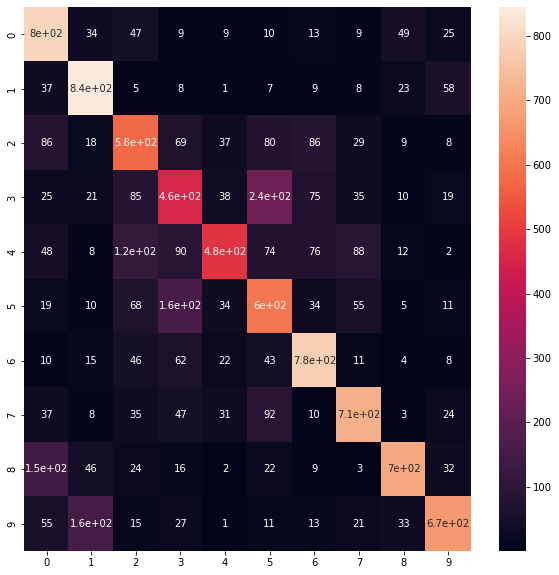

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)